## Quantum Illumination Experiment 3

__Error probabilities with respect to average photon numbers.__

- Author: L. Fan
- Created Date: 2017-09-19
- The Second Latest Modified: 2017-11-16
- The Latest Modified: 2017-11-19

--- 3799.040326356888 seconds ---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# configuration
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('pdf', 'png')
# np.set_printoptions(threshold='nan', precision=6, suppress=True)
plt.style.use(['seaborn-whitegrid', '14pt'])
%matplotlib inline

In [3]:
df1 = pd.read_csv('../output/data/expr_3/expr_3_nbar_nth_1.0_g_51_01-31.csv', comment='#')
df2 = pd.read_csv('../output/data/expr_3/expr_3_nbar_nth_1.0_g_51_03-20.csv', comment='#')

In [5]:
df1.shape, df2.shape

((306, 13), (456, 13))

In [4]:
df1.head()

,Nth,R,State,lambda,Aver_N,VN_Entropy,Helstrom_Bound,Chernoff_Bound,optimal_s,A_aver_N,B_aver_N,ra,rb
0,1.0,0.01,TMSS,0.001,0.000002,0.000015,0.499966,0.500000,0.5,9.999990e-07,9.999990e-07,NaN,NaN
1,1.0,0.01,TMSS,0.019,0.000722,0.003224,0.499360,0.499999,0.5,3.611304e-04,3.611304e-04,NaN,NaN
2,1.0,0.01,TMSS,0.037,0.002742,0.010409,0.498754,0.499997,0.5,1.370877e-03,1.370877e-03,NaN,NaN
3,1.0,0.01,TMSS,0.055,0.006068,0.020630,0.498150,0.499993,0.5,3.034178e-03,3.034178e-03,NaN,NaN
4,1.0,0.01,TMSS,0.073,0.010715,0.033388,0.497547,0.499988,0.5,5.357550e-03,5.357550e-03,NaN,NaN


## Plot

In [6]:
dashes = {'PA':[6,2], 'PAS':[6,2,1,2], 'PS':[3,2], 'PSA':[3,2,1,2], 'PCS':[1,1]}
names = ('TMSS', 'PS', 'PA', 'PSA', 'PAS', 'PCS')

## 1. Basic Properties

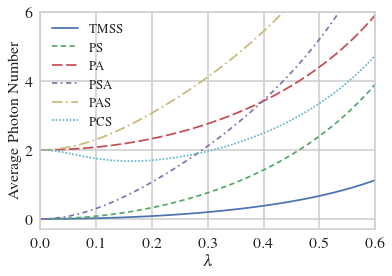

In [7]:
for name in names:
    temp_df = df1[df1['State'] == name]
    if name == 'TMSS':
        plt.plot(temp_df['lambda'], temp_df['Aver_N'], label=name)
    else:
        plt.plot(temp_df['lambda'], temp_df['Aver_N'], 
                 dashes=dashes[name], label=name)
plt.xlim(0, 0.6)
plt.ylim(-0.3, 6)
plt.legend(loc=2)
plt.xlabel("$\lambda$")
plt.ylabel("Average Photon Number")
plt.savefig('../output/figures/g_nbar_vs_lambda.pdf', bbox_inches='tight')

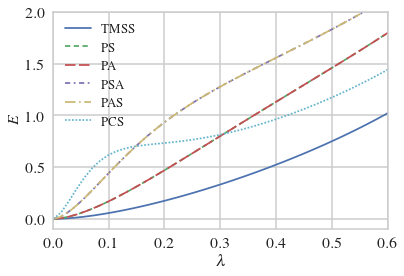

In [8]:
for name in names:
    temp_df = df1[df1['State'] == name]
    if name == 'TMSS':
        plt.plot(temp_df['lambda'], temp_df['VN_Entropy'], label=name)
    else:
        plt.plot(temp_df['lambda'], temp_df['VN_Entropy'], 
                 dashes=dashes[name], label=name)
plt.xlim(0, 0.6)
plt.ylim(-0.1, 2.0)
plt.legend(loc=2)
plt.xlabel("$\lambda$")
plt.ylabel("$E$")
plt.savefig('../output/figures/g_entropy_vs_lambda.pdf', bbox_inches='tight')

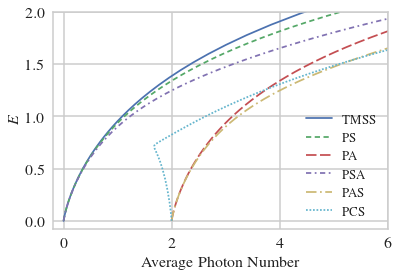

In [9]:
for name in names:
    temp_df = df1[df1['State'] == name]
    if name == 'TMSS':
        plt.plot(temp_df['Aver_N'], temp_df['VN_Entropy'], label=name)
    else:
        plt.plot(temp_df['Aver_N'], temp_df['VN_Entropy'], 
                 dashes=dashes[name], label=name)
plt.xlim(-0.2, 6)
plt.ylim(-0.08, 2.0)
plt.legend()
plt.xlabel("Average Photon Number")
plt.ylabel("$E$")
plt.savefig('../output/figures/g_entropy_vs_nbar.pdf', bbox_inches='tight')

## Error vs Lambda

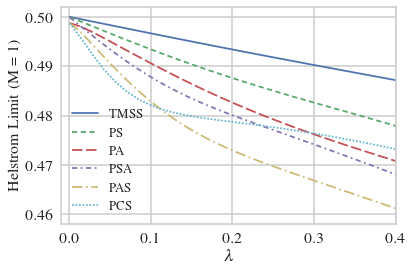

In [10]:
for name in names:
    temp_df = df1[df1['State'] == name]
    if name == 'TMSS':
        plt.plot(temp_df['lambda'], temp_df['Helstrom_Bound'], label=name)
    else:
        plt.plot(temp_df['lambda'], temp_df['Helstrom_Bound'], 
                 dashes=dashes[name], label=name)
plt.xlim(-0.01, 0.4)
plt.ylim(0.458, 0.502)
plt.legend(loc=3)
plt.xlabel("$\lambda$")
plt.ylabel("Helstrom Limit (M = 1)")
plt.legend()
# plt.savefig('../output/figures/g_qhb_vs_lambda_nth_1_full.pdf', bbox_inches='tight')

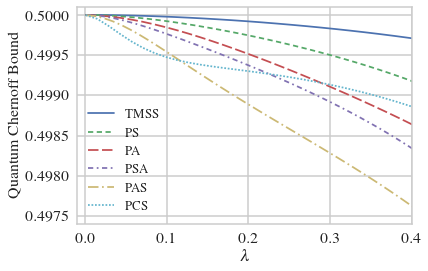

In [11]:
for name in names:
    temp_df = df1[df1['State'] == name]
    if name == 'TMSS':
        plt.plot(temp_df['lambda'], temp_df['Chernoff_Bound'], label=name)
    else:
        plt.plot(temp_df['lambda'], temp_df['Chernoff_Bound'], 
                 dashes=dashes[name], label=name)
plt.xlim(-0.01, 0.4)
plt.ylim(0.4974, 0.5001)
plt.legend(loc=3)
plt.xlabel("$\lambda$")
plt.ylabel("Quantum Chernoff Bound")
plt.legend(loc=0)
plt.savefig('../output/figures/g_qhb_vs_lambda_nth_1.pdf', bbox_inches='tight')

## Error vs Average Photon Number

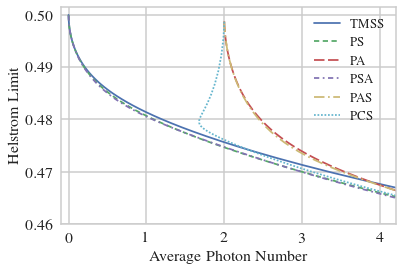

In [12]:
for name in names:
    temp_df = df1[df1['State'] == name]
    if name == 'TMSS':
        plt.plot(temp_df['Aver_N'], temp_df['Helstrom_Bound'], label=name)
    else:
        plt.plot(temp_df['Aver_N'], temp_df['Helstrom_Bound'], 
                 dashes=dashes[name], label=name)
plt.xlim(-0.1, 4.2)
plt.ylim(0.460, 0.5015)
plt.legend(loc=3, fontsize=13)
plt.xlabel("Average Photon Number")
plt.ylabel("Helstrom Limit")
# plt.title("Helstrom Bound under Small Squeezing Parameters", fontsize=12)
plt.legend(loc=0)
# plt.savefig('../output/figures/g_qhb_vs_nbar_nth_1_full.pdf', bbox_inches='tight')

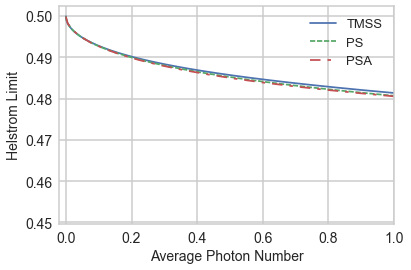

In [70]:
base = df1[df1['State'] == 'TMSS']['Helstrom_Bound']
for name in ('TMSS', 'PS', 'PSA'):
    temp_df = df1[df1['State'] == name]
#     print(name)
    if name == 'TMSS':
        plt.plot(temp_df['Aver_N'], temp_df['Helstrom_Bound'].values, label=name)
    else:
#         print(temp_df['Helstrom_Bound'])
        plt.plot(temp_df['Aver_N'], temp_df['Helstrom_Bound'].values, 
                 dashes=dashes[name], label=name)
plt.xlim(-0.02, 1.0)
# plt.ylim(-0.0012, 0.00005)
plt.legend(loc=0)
plt.xlabel("Average Photon Number")
plt.ylabel("Helstrom Limit")
# plt.title("Helstrom Bound under Small Squeezing Parameters", fontsize=12)
plt.legend(loc=0)
# plt.savefig('../output/figures/g_qhb_vs_nbar_nth_1_small.pdf', bbox_inches='tight')

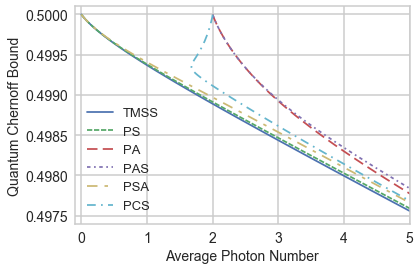

In [62]:
for name in names:
    temp_df = df1[df1['State'] == name]
    if name == 'TMSS':
        plt.plot(temp_df['Aver_N'], temp_df['Chernoff_Bound'], label=name)
    else:
        plt.plot(temp_df['Aver_N'], temp_df['Chernoff_Bound'], 
                 dashes=dashes[name], label=name)
plt.xlim(-0.1, 5)
plt.ylim(0.4974, 0.5001)
plt.legend(loc=3, fontsize=13)
plt.xlabel("Average Photon Number")
plt.ylabel("Quantum Chernoff Bound")
plt.savefig('../output/figures/g_qcb_vs_nbar_nth_1_full.pdf', bbox_inches='tight')

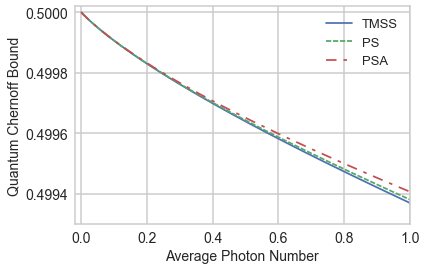

In [46]:
for name in ('TMSS', 'PS', 'PSA'):
    temp_df = df1[df1['State'] == name]
    if name == 'TMSS':
        ylist = [y(e / 51.0) for e in temp_df['Aver_N']]
        plt.plot(temp_df['Aver_N'], temp_df['Chernoff_Bound'].values, label=name)
    else:
        ylist = [y(e / 51.0) for e in temp_df['Aver_N']]
        plt.plot(temp_df['Aver_N'], temp_df['Chernoff_Bound'].values, 
                 dashes=dashes[name], label=name)
plt.xlim(-0.02, 1.0)
plt.ylim(0.4993, 0.50002)
plt.legend(loc=0)
plt.xlabel("Average Photon Number")
plt.ylabel("Quantum Chernoff Bound")
# plt.title("Helstrom Bound under Small Squeezing Parameters", fontsize=12)
plt.legend(loc=0)
# plt.savefig('../output/figures/g_qhb_vs_nbar_nth_1_small.pdf', bbox_inches='tight')

In [61]:
temp = df1[df1['lambda'] < 0.019]
temp

,Nth,R,State,lambda,Aver_N,VN_Entropy,Helstrom_Bound,Chernoff_Bound,optimal_s,A_aver_N,B_aver_N,ra,rb
0,1.0,0.01,TMSS,0.001,0.000002,0.000015,0.499966,0.500000,0.5,9.999990e-07,9.999990e-07,NaN,NaN
51,1.0,0.01,PS,0.001,0.000008,0.000054,0.499933,0.500000,0.5,4.000002e-06,4.000002e-06,NaN,NaN
52,1.0,0.01,PS,0.016,0.002048,0.008075,0.498923,0.499998,0.5,1.024131e-03,1.024131e-03,NaN,NaN
102,1.0,0.01,PA,0.001,2.000008,0.000054,0.498723,0.499997,0.5,1.000004e+00,1.000004e+00,NaN,NaN
103,1.0,0.01,PA,0.015,2.001800,0.007213,0.497973,0.499993,0.5,1.000900e+00,1.000900e+00,NaN,NaN
153,1.0,0.01,PSA,0.001,0.000032,0.000193,0.499865,0.500000,0.5,1.599991e-05,1.599991e-05,NaN,NaN
154,1.0,0.01,PSA,0.013,0.005403,0.018678,0.498251,0.499994,0.5,2.701320e-03,2.701320e-03,NaN,NaN
204,1.0,0.01,PAS,0.001,2.000032,0.000193,0.498691,0.499997,0.5,1.000016e+00,1.000016e+00,NaN,NaN
205,1.0,0.01,PAS,0.012,2.004604,0.016286,0.497283,0.499986,0.5,1.002302e+00,1.002302e+00,NaN,NaN
255,1.0,0.01,PCS,0.001,1.999953,0.000570,0.498640,0.499997,0.5,9.999764e-01,9.999764e-01,0.4,0.4


## Error vs Entropy

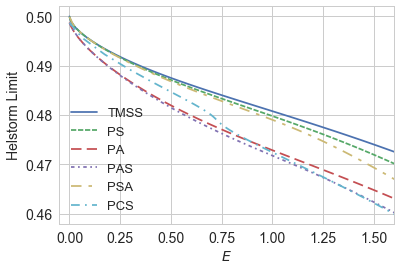

In [11]:
for name in names:
    temp_df = df1[df1['State'] == name]
    if name == 'TMSS':
        plt.plot(temp_df['VN_Entropy'], temp_df['Helstrom_Bound'], label=name)
    else:
        plt.plot(temp_df['VN_Entropy'], temp_df['Helstrom_Bound'], 
                 dashes=dashes[name], label=name)
plt.xlim(-0.05, 1.6)
plt.ylim(0.458, 0.502)
plt.legend(loc=3, fontsize=13)
plt.xlabel("$E$")
plt.ylabel("Helstorm Limit")
# plt.title("Helstrom Limits vs. von Neumann Entropy", fontsize=12)
# plt.savefig('../output/figures/g_qhb_vs_entropy_nth_1.pdf', bbox_inches='tight')

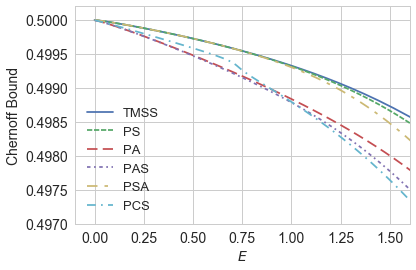

In [12]:
for name in names:
    temp_df = df1[df1['State'] == name]
    if name == 'TMSS':
        plt.plot(temp_df['VN_Entropy'], temp_df['Chernoff_Bound'], label=name)
    else:
        plt.plot(temp_df['VN_Entropy'], temp_df['Chernoff_Bound'], 
                 dashes=dashes[name], label=name)
plt.xlim(-0.1, 1.6)
plt.ylim(0.497, 0.5002)
plt.legend(fontsize=13)
plt.xlabel("$E$")
plt.ylabel("Chernoff Bound")
# plt.title("Helstrom Limits vs. von Neumann Entropy", fontsize=12)
# plt.savefig('../output/figures/g_qcb_vs_entropy_nth_1.pdf', bbox_inches='tight')